# Sales Summary Report
The project displays the sales sub_total summary of different families of products traded by a given dealer. 
I had to merge the tables(train, holidays, stores, oil, and transactions data sets).Then apply the **groupby** function and **sorting_values** based on certain variables here refered to as fields to come up with the required dashboards

# Importing dependency libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Initializing working directory
Our directory contains the datasets to analyse. This where we will store our processed data output even after analysis

In [2]:
os.chdir(r"C:\Users\Dan Masibo\Documents\dash and plotly")

# Reading dataset into our notebook from our working directory

This shop has five datasets that we shall use for our analysis and coming up with the required dashboards: Train, holiday_events, stores, Oil, and Transactions.😀

In [3]:
stores=pd.read_csv("stores.csv")
oil=pd.read_csv("oil.csv")
transactions=pd.read_csv("transactions.csv")
holidays=pd.read_csv("holidays_events.csv")
train=pd.read_csv("train.csv")
display(stores.head(2))
display(oil.head(2))
display(transactions.head(2))
display(holidays.head(2))
display(train.head(2))

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


Below is a dashboard showing the aggregate of the average clusters per each city in the **stores** dataset.

In [4]:
stores.groupby("city").agg({"cluster":"mean"}).reset_index().sort_values(by="cluster", inplace=False, ascending=False)

,city,cluster
7,Guaranda,15.000000
10,Latacunga,15.000000
9,Ibarra,15.000000
14,Manta,12.000000
0,Ambato,11.500000
18,Quito,10.888889
1,Babahoyo,10.000000
11,Libertad,10.000000
6,Esmeraldas,10.000000
8,Guayaquil,7.500000


We're able to display the unique kinds of states in he **stores** dataset

In [5]:
stores['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [6]:
df_1=stores.groupby('state').agg({"cluster":"sum"}).reset_index().sort_values(by='cluster', ascending=False, inplace=False)
df_1.to_excel("dashboard_agg.xlsx", index=None)

In [7]:
stores["city"].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

**Merging** datasets into a one dataset called train_1

In [8]:
train_1=train.merge(holidays, on='date', how="left")
train_1=train_1.merge(stores, on="store_nbr", how="left")
train_1=train_1.merge(oil, on=['date'], how='left')
train_1=train_1.merge(transactions, on=['date', 'store_nbr'], how='left')

In [10]:
train_1.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,NaN


Checking for any ***mising*** values .This is a guide for any data that may not have been captured. This informs us on the need to follow up with the sources.

In [11]:
train_1.isnull().mean()*100

id               0.000000
date             0.000000
store_nbr        0.000000
family           0.000000
sales            0.000000
onpromotion      0.000000
type_x          83.547258
locale          83.547258
locale_name     83.547258
description     83.547258
transferred     83.547258
city             0.000000
state            0.000000
type_y           0.000000
cluster          0.000000
dcoilwtico      31.271879
transactions     8.156143
dtype: float64

***Dashboard*** indicating the sub_total summary of the aggregate sales per each family of product or services rendered. 

In [12]:
agg_sales=train_1.groupby("family").agg({"sales":"sum"}).reset_index().sort_values(by='sales', ascending=False)

In [13]:
agg_sales=agg_sales.rename(columns={'sales':'agg_sales'})

In [14]:
agg_sales

,family,agg_sales
12,GROCERY I,3.508273e+08
3,BEVERAGES,2.216635e+08
30,PRODUCE,1.254480e+08
7,CLEANING,9.942102e+07
8,DAIRY,6.582360e+07
5,BREAD/BAKERY,4.295992e+07
28,POULTRY,3.249445e+07
24,MEATS,3.165100e+07
25,PERSONAL CARE,2.510048e+07
9,DELI,2.458563e+07


A bar graph showing the ***visual representation*** of the aggregate sales in the ***dashboard***

<BarContainer object of 10 artists>

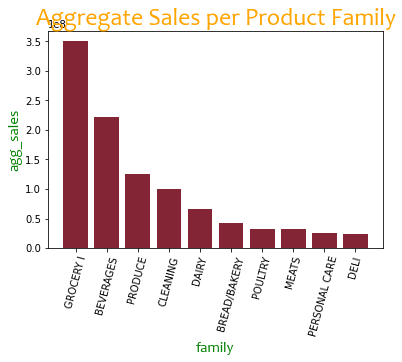

In [15]:
family=agg_sales['family'].head(10)
agg_sales=agg_sales['agg_sales'].head(10)
plt.title('Aggregate Sales per Product Family', fontname='Candara', fontsize=24, color='orange')
plt.xlabel('family', fontname='Candara', fontsize=15, color='green')
plt.ylabel('agg_sales', fontname='Candara', fontsize=15, color='green')
plt.xticks(rotation=75)
plt.bar(family, agg_sales, color="#842535")

The code sends in ***excel format*** the aggregate sales dashboard to the ***local directory*** for share to the end user.

In [16]:
#agg_sales.to_excel('agg_sales.xlsx')